In [2]:
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import import_ipynb
from scipy.interpolate import PchipInterpolator
import seaborn as sns

c:\Users\PC BULLOCK\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
def symbolic_sequence_f(orbit, num_partitions):

    def split_partitions(num_partitions):
        symbols = list(range(1, num_partitions + 1))
        partitions = []

        partition_points = np.linspace(0, 1, num_partitions + 1)

        for i in range(num_partitions):
            start = partition_points[i]
            end = partition_points[i + 1]
            symbol = partition_points[i]
            partitions.append((start, end, symbol))
        return partitions


    sequence = []
    partitions = split_partitions(num_partitions)

    for x in orbit:
        
        # Determinar en qué partición cae x y agregar el símbolo correspondiente
        for (start, end, symbol) in partitions:
            if start <= x < end:
                sequence.append(symbol)
                break

    return sequence

In [5]:
def J_bivariante(X,Y,tau,fases):
    def distancia(p1, p2):
        return np.linalg.norm(np.array(p2)-np.array(p1))
    ff1 = np.angle(np.fft.rfft(X))[:fases]
    ff2 = np.angle(np.fft.rfft(Y))[:fases]
    vectores = []
    for i in range(len(ff1)-1):
        p1 = [ff1[i], ff2[i]]
        p2 = [ff1[i+1], ff2[i+1]]
        cuadrante = [[p2[0]-p1[0], p2[1]-p1[1]], [p2[0]-p1[0], p2[1]+2*np.pi-p1[1]],
            [p2[0]+2*np.pi-p1[0],p2[1]+2*np.pi-p1[1]],[p2[0]+2*np.pi-p1[0],p2[1]-p1[1]],
            [p2[0]+2*np.pi-p1[0],p2[1]-2*np.pi-p1[1]],[p2[0]-p1[0],p2[1]-2*np.pi-p1[1]],
            [p2[0]-2*np.pi-p1[0],p2[1]-2*np.pi-p1[1]],[p2[0]-2*np.pi-p1[0],p2[1]-p1[1]],
            [p2[0]-2*np.pi-p1[0],p2[1]+2*np.pi-p1[1]]]
        distancia1 = [distancia(p1,c) for c in cuadrante]
        p2=cuadrante[np.argmin(distancia1)]
        vectores.append([p2[0]-p1[0],p2[1]-p1[1]])
    angulos=[]
    for i in range(len(vectores)-1):
        v1=vectores[i]
        v2=vectores[i+1]
        v1_norm=v1/np.linalg.norm(v1)
        v2_norm=v2/np.linalg.norm(v2)
        angulo=np.arccos(np.clip(np.dot(v1_norm,v2_norm),-1.0,1.0))
        cruz=v1[0]*v2[1]-v1[1]*v2[0]
        if cruz>0:
            angulo=np.pi-angulo
        if cruz==0 and angulo==0:
            angulo=angulo
        if cruz==0 and angulo<0:
            angulo=np.pi
        if cruz<0:
            angulo=angulo+np.pi
        angulos.append(angulo)
    e=[]
    for k in range(len(angulos)):
        e.append(np.exp(angulos[k]*1j))
    e1=np.sum(e)/len(angulos)
    J=1.-np.abs(e1.real)
    return J

In [6]:
def J_univariante(X,tau,fases):
    def distancia(p1, p2):
        return np.linalg.norm(np.array(p2)-np.array(p1))
    x1 = X[tau:]
    y1 = X[:-tau]
    ff1 = np.angle(np.fft.rfft(x1))[:fases]
    ff2 = np.angle(np.fft.rfft(y1))[:fases]
    
    vectores = []
    for i in range(len(ff1)-1):
        p1 = [ff1[i], ff2[i]]
        p2 = [ff1[i+1], ff2[i+1]]
        cuadrante = [[p2[0]-p1[0], p2[1]-p1[1]], [p2[0]-p1[0], p2[1]+2*np.pi-p1[1]],
            [p2[0]+2*np.pi-p1[0],p2[1]+2*np.pi-p1[1]],[p2[0]+2*np.pi-p1[0],p2[1]-p1[1]],
            [p2[0]+2*np.pi-p1[0],p2[1]-2*np.pi-p1[1]],[p2[0]-p1[0],p2[1]-2*np.pi-p1[1]],
            [p2[0]-2*np.pi-p1[0],p2[1]-2*np.pi-p1[1]],[p2[0]-2*np.pi-p1[0],p2[1]-p1[1]],
            [p2[0]-2*np.pi-p1[0],p2[1]+2*np.pi-p1[1]]]
        distancia1 = [distancia(p1,c) for c in cuadrante]
        p2 = cuadrante[np.argmin(distancia1)]
        vectores.append([p2[0]-p1[0],p2[1]-p1[1]])
    angulos = []
    for i in range(len(vectores)-1):
        v1=vectores[i]
        v2=vectores[i+1]
        if np.linalg.norm(v1) == 0:
            v1_norm=v1
        else:
            v1_norm=v1/np.linalg.norm(v1)
        if np.linalg.norm(v2) == 0:
            v2_norm=v2
        else:
            v2_norm=v2/np.linalg.norm(v2)
        angulo=np.arccos(np.clip(np.dot(v1_norm,v2_norm),-1.0,1.0))
        cruz=v1[0]*v2[1]-v1[1]*v2[0]
        if cruz>0:
            angulo=np.pi-angulo
        if cruz==0 and angulo==0:
            angulo=angulo
        if cruz==0 and angulo<0:
            angulo=np.pi
        if cruz<0:
            angulo=angulo+np.pi
        angulos.append(angulo)
    e=[]
    for k in range(len(angulos)):
        e.append(np.exp(angulos[k]*1j))
    e1=np.sum(e)/len(angulos)
    J=1.-np.abs(e1.real)
    return J

In [7]:


def lyapunov_exponent_from_orbit(orbit, r):
    lyapunov_sum = 0

    for x in orbit:
        # Derivada de la función logística
        derivative = abs(r * (1 - 2 * x))
        if derivative == 0:
            lyapunov_sum += 0
        else:
            lyapunov_sum += np.log(derivative)

    # Calcular el exponente de Lyapunov
    lyapunov_exponent = lyapunov_sum / len(orbit)
    return lyapunov_exponent


Dinámica simbólica


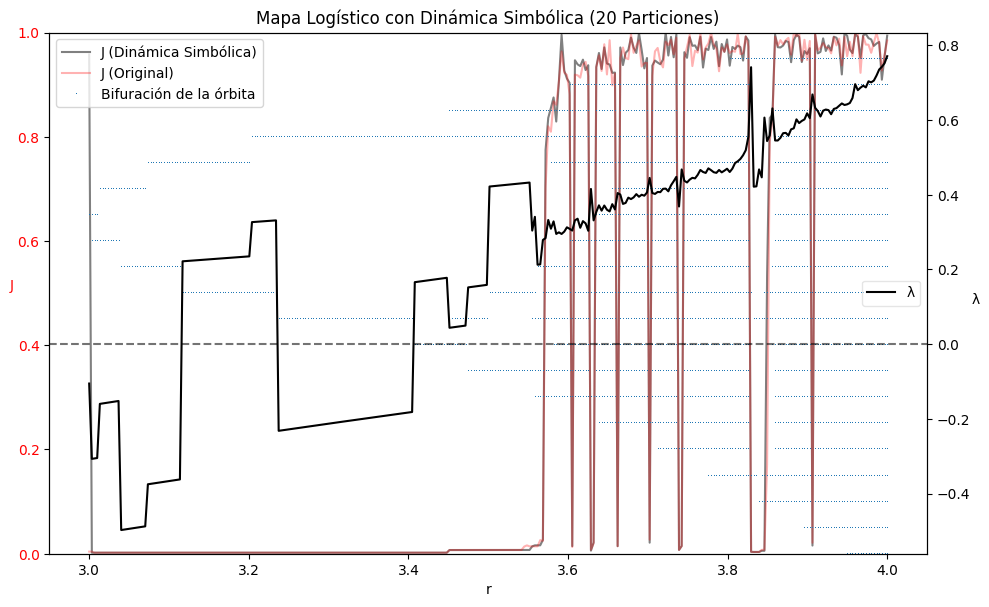

In [19]:
"""interpolacion despues de dinamica simbolica"""


def logistic_map(r, x):
    return r * x * (1 - x)

def plot_orbit_diagram(num_partitions,discreto,interpolacion, size,graficar, r_min = 3.0, r_max = 4.0, num_points_per_r=300,
 num_iterations_discard=1000, num_iterations_display=2000):
    if discreto == "no" and interpolacion == "si": 
        print("Haz seleccionado interpolación a los datos continuos, eso no tiene caso")
        return 1,2

    if interpolacion == "si":
        print("Interpolación")

    r_values = []
    orbit_values = []
    
    for r in np.linspace(r_min, r_max, num_points_per_r):
        
        x = 0.6
        for _ in range(num_iterations_discard): # Converger
            x = logistic_map(r, x)

        
        for _ in range(num_iterations_display):
            x = logistic_map(r, x)
            r_values.append(r)
            orbit_values.append(x)
    #A partir de aqui, orbita continua de logistica completada
    if discreto == "si":
        print('Dinámica simbólica')
        orbit_values = symbolic_sequence_f(orbit_values, num_partitions)


        

    a = 0
    J_values=[]
    J_index=[]
    lyapunov_values = []
    
    r_values_interp = []
    orbit_values_interp = np.array([])

    for i in range(0, len(r_values) - 1):
        if r_values[i] != r_values[i+1]:
            r_single_orbit = orbit_values[a:i+1]
            a = i+1
            
            if interpolacion == 'si':
                x = np.arange(len(r_single_orbit))
                x_new = np.linspace(0, len(r_single_orbit) - 1, size)
                x_new = np.unique(np.concatenate((x, x_new)))  
                
                data_interp = np.interp(x_new, x, r_single_orbit)
                # interpolator = PchipInterpolator(x, r_single_orbit)
                # data_interp = interpolator(x_new)
                r_values_interp = r_values_interp + [r_values[i]]*len(data_interp)
                orbit_values_interp = np.concatenate((orbit_values_interp, data_interp))

                r_single_orbit = data_interp


            lyapunov = lyapunov_exponent_from_orbit(r_single_orbit, r_values[i])
            lyapunov_values.append(lyapunov)

            J = J_univariante(r_single_orbit, 1, int(len(r_single_orbit)))
            
            J_values.append(J)
            J_index.append(r_values[i])
    
    #ultimo valor de r
    lyapunov = lyapunov_exponent_from_orbit(orbit_values[a:], r_values[len(r_values) - 1])  
    lyapunov_values.append(lyapunov)
    J = J_univariante(orbit_values[a:], 1, int(len(r_single_orbit)))
    J_values.append(J)
    J_index.append(r_values[len(r_values) - 1])

    #A partir de aqui, lyapunob y J fueron calculados

    with open('logistic_map/j_logistic_continuo.txt', 'r') as f:
        J_continuo = [float(line.strip()) for line in f]
    
    if graficar == True:
        fig, ax1 = plt.subplots(figsize=(10,6))
        
        if discreto == "no":
            color = "red"
        elif discreto == "si":
            color = "gray"
        ax1.plot(J_index, J_values, color , label='J (Dinámica Simbólica)', alpha = 1)

        if discreto == "si":
            ax1.plot(J_index, J_continuo, 'red',label='J (Original)', alpha = 0.3)
            if interpolacion == "si":
                ax1.plot(r_values_interp, orbit_values_interp, ',', label=f'Bifuración de la órbita (+ Interpolación de {num_partitions} datos)', alpha=1)
            else: 
                ax1.plot(r_values, orbit_values, ',', label='Bifuración de la órbita', alpha=1)
        if discreto == "no":
            ax1.plot(r_values, orbit_values, ',', label='Bifurcación de la órbita', alpha=1)
        ax1.set_xlabel('r')
        ax1.set_ylabel('J', color='r', rotation = 360)
        ax1.tick_params(axis='y', labelcolor='r')
        ax1.set_ylim(0,1)
        ax1.legend(loc = 'upper left')
        
        ax2 = ax1.twinx()
        if discreto == "si":

            ax2.axhline(y=0, color='black', linestyle='--', alpha =0.55)
            ax2.plot(J_index, lyapunov_values, 'black', label = 'λ')

        if discreto == "no":
            ax2.axhline(y=0, color='black', linestyle='--', alpha =0.55)
            ax2.plot(J_index, lyapunov_values, 'black', label = 'λ')
        ax2.set_ylabel('λ', color='black', rotation = 360)
        ax2.tick_params(axis='y', labelcolor='black')
        ax2.legend(loc='center right',framealpha=0.5)
        
        fig.tight_layout()  
        # plt.title(f'Logistic Map (Discret ={discreto}, interp= {interpolacion})')
        plt.title(f'Mapa Logístico con Dinámica Simbólica ({num_partitions} Particiones)')
        plt.show()

    
    if interpolacion == 'no':
        return J_index, J_values, r_values, orbit_values, lyapunov_values
    else:
        return J_index, J_values, r_values_interp, orbit_values_interp, lyapunov_values 




J_index, J_values, r_values, orbit_values, lyapunov_values = plot_orbit_diagram(20,"si", "no", 20 ,True)
# J_index, J_values, r_values, orbit_values, lyapunov_values = plot_orbit_diagram(2000,"si", "no", 20 ,True)

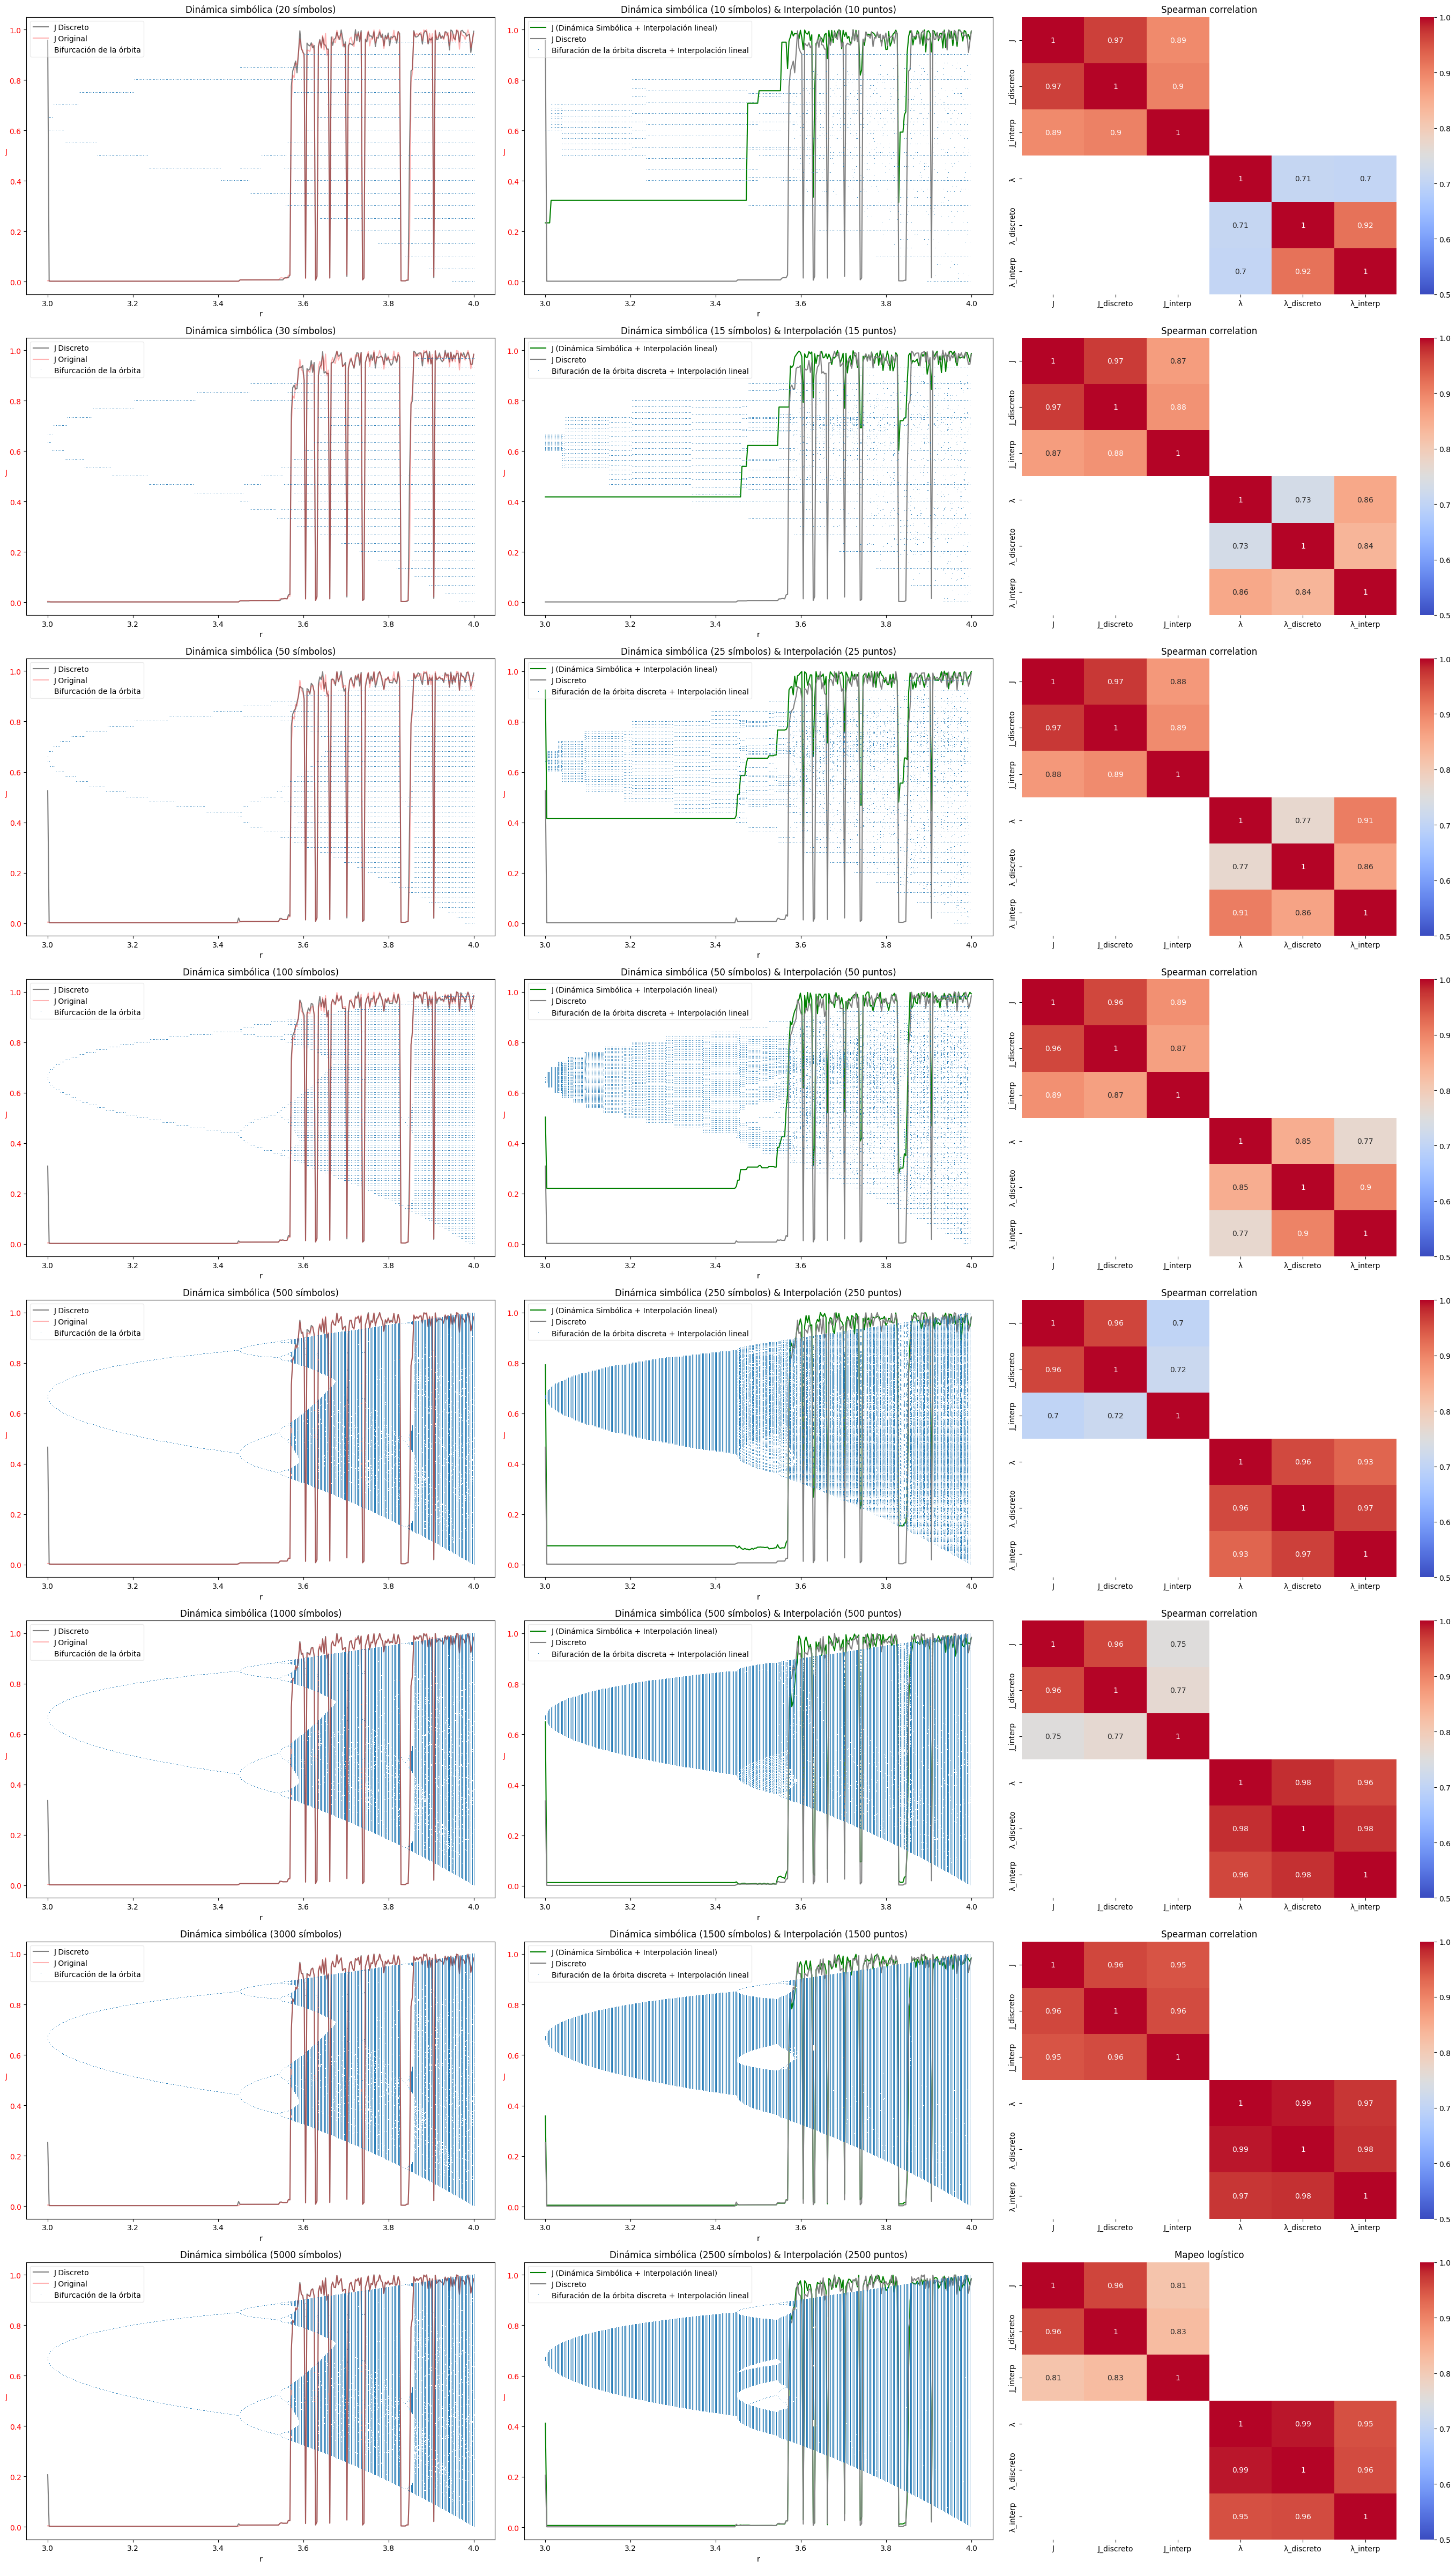

In [26]:
carpeta = 'logistic_map'
guardar = False

# corr_J_discret_list, corr_J_interp_herm, corr_lyapunov_discret_list, corr_lyapunov_interp_herm = [],[],[],[]
corr_J_discret_list, corr_J_interp_lineal, corr_lyapunov_discret_list, corr_lyapunov_interp_lineal = [],[],[],[]

with open('logistic_map/lyapunov_continuo.txt', 'r') as f:
        lyapunov_continuo = [float(line.strip()) for line in f]

with open('logistic_map/j_logistic_continuo.txt', 'r') as f:
        J_continuo = [float(line.strip()) for line in f]

with open('logistic_map/j_index.txt', 'r') as f:
        J_index = [float(line.strip()) for line in f]

# Primera fila
splits = [20, 30, 50,100, 500, 1000, 3000, 5000]
# splits = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19, 20, 30, 50,100, 500, 1000,1500,2000,2500, 3000,3500, 4000,4500, 5000]

# splits = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
# splits = [1500, 2500, 3500,4500]
fig, axs = plt.subplots(len(splits), 3, figsize=(28, 48))
for i,split in enumerate(splits):
    size = split//2

    # [0,0]
    if guardar == False:
        data = pd.read_csv(carpeta + '/df_' + str(split) + '.csv')
        data_discreto = pd.read_csv(carpeta + '/df_discreto_' + str(split) + '.csv')
        data_interp = pd.read_csv(carpeta + '/df_interp_' + str(split) + '.csv')
        J_values = data['J_discreto']
        r_values = data_discreto['r_values']
        orbit_values = data_discreto['orbit_values']
        lyapunov_values = data['λ_discreto']
        J_values_interp = data['J_interp']
        r_values_interp = data_interp['r_values_interp']
        orbit_values_interp = data_interp['orbit_values_interp']
        lyapunov_values_interp = data['λ_interp']
        data2 = data.drop(['λ_interp','λ_discreto','λ'], axis=1)
    
    if guardar == True:    
        J_index, J_values, r_values, orbit_values, lyapunov_values = plot_orbit_diagram(split,"si", 'no', size, False)

    axs[i, 0].plot(J_index, J_values, 'gray' , label='J Discreto', alpha = 1)
    axs[i, 0].plot(J_index, J_continuo, 'red', alpha = 0.3, label = 'J Original')
    axs[i, 0].plot(r_values, orbit_values, ',', label='Bifurcación de la órbita', alpha=1)
    axs[i, 0].set_title(f'Dinámica simbólica ({split} símbolos)')
    axs[i, 0].set_xlabel('r')
    axs[i, 0].set_ylabel('J', color='r', rotation = 360)
    axs[i, 0].tick_params(axis='y', labelcolor='r')
    axs[i, 0].legend(loc = 'upper left', framealpha = 0.4)

#     ax2 = axs[i, 0].twinx()

#     ax2.axhline(y=0, color='black', linestyle='--', alpha =0.55)
#     ax2.plot(J_index, lyapunov_values, 'black', label = 'λ')
#     ax2.set_ylabel('λ', color='black', rotation = 360)
#     ax2.tick_params(axis='y', labelcolor='black')



    # [0, 1]
    if guardar == True:
        J_index, J_values_interp, r_values_interp, orbit_values_interp, lyapunov_values_interp = plot_orbit_diagram(split//2,"si", 'si', size, False)

    axs[i, 1].plot(J_index, J_values_interp, 'green' , label='J (Dinámica Simbólica + Interpolación lineal)', alpha = 1)
    axs[i, 1].plot(J_index, J_values, 'gray' , label='J Discreto', alpha = 1)
    axs[i, 1].plot(r_values_interp, orbit_values_interp, ',', label='Bifuración de la órbita discreta + Interpolación lineal', alpha=1)
    axs[i, 1].set_xlabel('r')
    axs[i, 1].set_ylabel('J', color='r', rotation = 360)
    axs[i, 1].tick_params(axis='y', labelcolor='r')
    axs[i, 1].set_title(f'Dinámica simbólica ({split//2} símbolos) & Interpolación ({size} puntos)')
    axs[i, 1].legend(loc = 'upper left',framealpha = 0.4)
#     ax3 = axs[i, 1].twinx()

#     ax3.axhline(y=0, color='black', linestyle='--', alpha =0.55)
#     ax3.plot(J_index, lyapunov_values_interp, 'black', label = 'λ')
#     ax3.set_ylabel('λ', color='black', rotation = 360)
#     ax3.tick_params(axis='y', labelcolor='black')

    # [0, 2]
    """Compute"""
    ########################
    if guardar == True:
        data = pd.DataFrame({
                'J': J_continuo,
                'J_discreto': J_values,
                'J_interp': J_values_interp,
                'λ': lyapunov_continuo,
                'λ_discreto': lyapunov_values,
                'λ_interp': lyapunov_values_interp,
        })
        data.to_csv(carpeta + '/df_' + str(split) + '.csv', index=False)

        data_interp = pd.DataFrame({
                'r_values_interp': r_values_interp,
                'orbit_values_interp': orbit_values_interp,
        })

        data_discreto = pd.DataFrame({
                'r_values': r_values,
                'orbit_values': orbit_values,
        })

        # with open('J_index.txt', "w") as f:
        #         for item in J_index: # a menos que cambie tamaño de iteraciones de función, no guardar J_index
        #         f.write(f"{item}\n")
        
        data_discreto.to_csv(carpeta + '/df_discreto_' + str(split) + '.csv', index=False)
        data_interp.to_csv(carpeta + '/df_interp_' + str(split) + '.csv', index=False)
    ########################

    corr_spearman = data.corr(method='spearman')
    corr_J_discret_list.append(corr_spearman.loc['J','J_discreto'])
    corr_J_interp_lineal.append(corr_spearman.loc['J','J_interp'])
    corr_lyapunov_discret_list.append(corr_spearman.loc['λ','λ_discreto'])
    corr_lyapunov_interp_lineal.append(corr_spearman.loc['λ','λ_interp'])

    mask = np.ones_like(corr_spearman, dtype=bool)
    for k in [0, 1, 2]:
        for l in [0, 1, 2]:
            mask[k,l] = False
        for l in [3, 4, 5]:
            mask[k+3, l] = False 
    corr_spearman = corr_spearman.where(~mask)
    sns.heatmap(corr_spearman, ax=axs[i, 2], annot=True, cmap='coolwarm', vmin=0.5, vmax=1.0)
    axs[i, 2].set_title('Spearman correlation')

# Ajustar el layout para que no haya superposición de títulos y etiquetas
plt.tight_layout()

# Mostrar el plot
plt.title('Mapeo logístico')
plt.show()

# plt.plot(splits, )


In [13]:
"""Grafica  de corr vs M para lyapunov y J discretos
Grafica de corr vs M para lyapunov y J interpolados lineal y hermite 
Xn vs r 50 particiones J_original, J_discreta, lyapunov_discreto
Xn vs r 1500 particiones J_original, J_discreta, lypunov_discreto"""

'Grafica  '

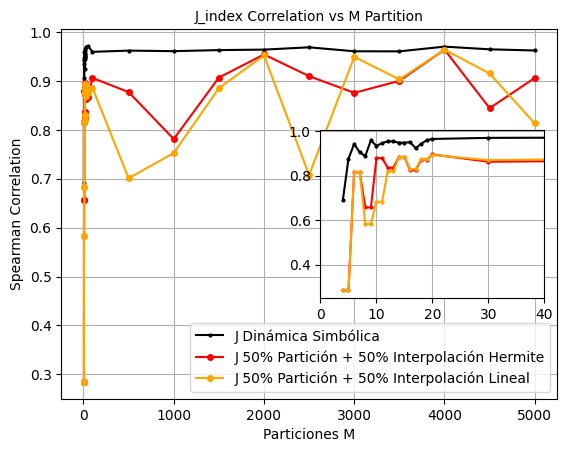

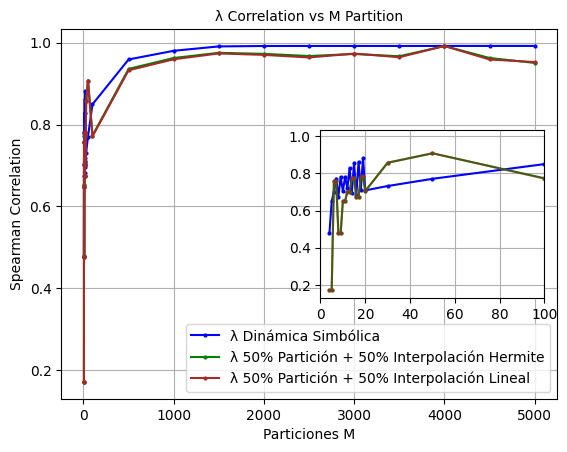

In [146]:
x = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19, 20, 30, 50,100, 500, 1000,1500,2000,2500, 3000,3500, 4000,4500, 5000]

# Crear la gráfica principal
fig, ax = plt.subplots()
ax.plot(x,corr_J_discret_list, label = 'J Dinámica Simbólica',markersize = 4, color = 'black', marker='.', linestyle='-')
ax.plot(x, corr_J_interp_herm, markersize = 4, label = 'J 50% Partición + 50% Interpolación Hermite', color = 'red', marker='o', linestyle='-')
ax.plot(x, corr_J_interp_lineal,markersize = 4, label = 'J 50% Partición + 50% Interpolación Lineal',color = 'orange', marker='o', linestyle='-')
# Crear la gráfica de zoom como un inset
ax_inset = fig.add_axes([0.53, 0.32, 0.35, 0.35])  # [left, bottom, width, height] en coordenadas normalizadas
ax_inset.plot(x,corr_J_discret_list, color='black',marker='.', linestyle='-', markersize = 4)
ax_inset.plot(x,corr_J_interp_herm, color='red',marker='.', linestyle='-', markersize = 4)
ax_inset.grid()
ax_inset.plot(x,corr_J_interp_lineal, color='orange', marker='.', linestyle='-', markersize = 4)
ax_inset.set_xlim(0, 40)
ax.set_xlabel('Particiones M')
ax.set_ylabel('Spearman Correlation')
ax.grid()
ax.set_title('J_index Correlation vs M Partition', fontsize=10)
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(x,corr_lyapunov_discret_list, label = 'λ Dinámica Simbólica',color = 'blue',markersize = 4, marker='.', linestyle='-')
ax.plot(x, corr_lyapunov_interp_herm, label = 'λ 50% Partición + 50% Interpolación Hermite',color = 'green',markersize = 4, marker='.', linestyle='-')
ax.plot(x, corr_lyapunov_interp_lineal, label = 'λ 50% Partición + 50% Interpolación Lineal',color = 'brown',markersize = 4, marker='.', linestyle='-')
# Crear la gráfica de zoom como un inset
ax_inset = fig.add_axes([0.53, 0.32, 0.35, 0.35])  # [left, bottom, width, height] en coordenadas normalizadas
ax_inset.plot(x,corr_lyapunov_discret_list, color='blue',marker='.', linestyle='-', markersize = 4)
ax_inset.plot(x,corr_lyapunov_interp_herm, color='green',marker='.', linestyle='-', markersize = 4)
ax_inset.grid()
ax_inset.plot(x,corr_lyapunov_interp_lineal, color='brown',alpha = 0.5, marker='.', linestyle='-', markersize = 4)
ax_inset.set_xlim(0, 100)
ax.set_xlabel('Particiones M')
ax.set_ylabel('Spearman Correlation')
ax.grid()
ax.set_title('λ Correlation vs M Partition',fontsize=10)
ax.legend()
plt.show()

In [ ]:
"""Entender interpolacion"""

# Generar 2000 datos aleatorios en el rango de 1 a 130
lista_aleatoria = np.random.randint(1, 101, size=20)

# Ordenar la lista de menor a mayor
lista_ordenada = np.sort(lista_aleatoria)

# Convertir a lista de Python (opcional)
y = lista_ordenada.tolist()
y = [10, 40, 20, 30]*6

x = np.arange(len(y))
x_new = np.linspace(0, len(y) - 1, 50)
x_new = np.unique(np.concatenate((x, x_new)))  
data_interp = np.interp(x_new, x, y)
interpolator = PchipInterpolator(x, y)
data_interp2 = interpolator(x_new)
print(len(data_interp))

plt.plot([4.9]*len(data_interp), data_interp, '.')
plt.xlim(4.7,5.3)
plt.plot([5.1]*len(data_interp2), data_interp2, '.')
print(data_interp)
# plt.plot([5]*len(y), y, '.',color = 'orange', alpha = 0.6)
plt.show()